In [26]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
root = 'E:\jupyter\CS231n\Assignment1\data\cifar-10-batches-py'
X_train,Y_train,X_test,Y_test = load_CIFAR10(root)

print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', Y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


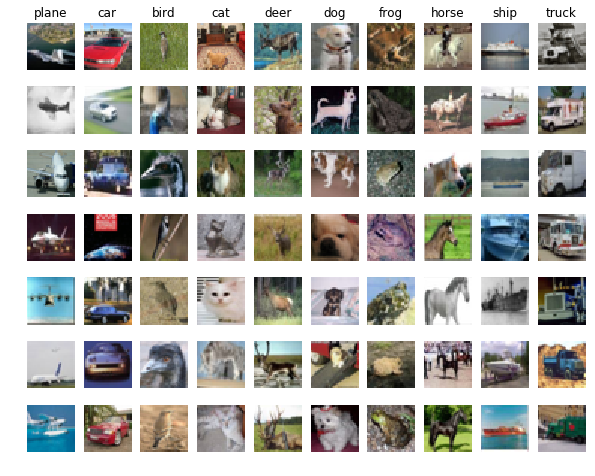

In [28]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y,cls in enumerate(classes):
    indexs = np.flatnonzero(Y_train == y)
    indexs = np.random.choice(indexs,samples_per_class,replace = False)
    for i,index in enumerate(indexs):
        plt_index = i * num_classes + 1 + y 
        plt.subplot(samples_per_class,num_classes,plt_index)
        plt.imshow(X_train[index].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()
        

In [29]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500
#create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.

mask = range(num_training,num_training + num_validation)
X_val = X_train[mask]
Y_val = Y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
Y_train = Y_train[mask]
#print(mask)
mask = range(num_test)
X_test = X_test[mask]
Y_test = Y_test[mask]

mask = np.random.choice(num_training,num_dev,replace = False)
X_dev = X_train[mask]
Y_dev = Y_train[mask]

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', Y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', Y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [30]:
X_train = np.reshape(X_train,(X_train.shape[0],-1))
X_test = np.reshape(X_test,(X_test.shape[0],-1))
X_val = np.reshape(X_val,(X_val.shape[0],-1))
X_dev = np.reshape(X_dev,(X_dev.shape[0],-1))

print ('Training data shape: ', X_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Test data shape: ', X_test.shape)
print ('dev data shape: ', X_dev.shape)


Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[ 130.64189796  135.98173469  132.47391837  130.05569388  135.34804082
  131.75402041  130.96055102  136.14328571  132.47636735  131.48467347]


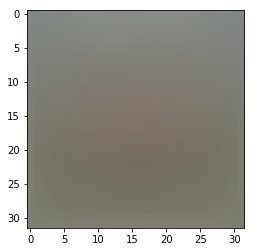

In [31]:
mean_image = np.mean(X_train,axis=0)#输出的矩阵是一行 按列求平均(一共3072列)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()


In [32]:
#减去平均值
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

#在train、val、test、dev数据后面加一列1 可用来代替bias 所以只需要考虑W 不用考虑b了
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])#hstack水平存储
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print (X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [43]:
from classifiers.linear_svm import svm_loss_naive 
from classifiers.linear_svm import svm_loss_vectorized
import time

print(Y_dev.shape)
W = np.random.randn(3073,10) * 0.0001 #0.0001？？？
start = time.time()
loss1 ,grad1 = svm_loss_naive(W,X_dev,Y_dev,0.00001)
end = time.time()
#print(end - start)

W = np.random.randn(3073,10) * 0.0001 #0.0001？？？
start = time.time()
loss2 ,grad2 = svm_loss_vectorized(W,X_dev,Y_dev,0.00001)
end = time.time()
print(end - start)

print(loss1,loss2)#Q1:两种方法loss为什么不一样(W不一样)
print(grad1)


(500,)
0.011007547378540039
9.28163967038 8.96269820607
[[  7.88689347e-01   2.50581920e-01  -1.00600125e+01 ...,   7.09679678e+00
   -1.95467842e+01  -3.02224870e+01]
 [ -1.82124749e+01   8.79479388e-01  -4.96895898e+00 ...,   8.85757082e+00
   -3.47086118e+01  -3.64843927e+01]
 [ -4.59356781e+01  -8.70599263e-01   8.30277477e+00 ...,   1.03452430e+01
   -5.19440178e+01  -4.89277048e+01]
 ..., 
 [ -4.21358906e+00   5.18295037e+00  -4.74036261e+00 ...,  -1.55501285e+01
    1.22704911e+01  -4.04185241e+00]
 [ -2.03076111e+01  -4.05285914e+00   2.46873057e+00 ...,   3.97963686e+00
   -5.97236743e+00  -9.01716229e+00]
 [ -2.59999993e-02  -1.38000001e-01  -1.61999999e-01 ...,   8.59999978e-02
    7.59999990e-02   8.80000000e-02]]


In [41]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, Y_dev, 0.00001)
toc = time.time()
print ('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, Y_dev, 0.00001)
toc = time.time()
print ('Vectorized loss and gradient: computed in %fs' % (toc - tic))

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print ('difference: %f' % difference)

Naive loss and gradient: computed in 0.310205s
Vectorized loss and gradient: computed in 0.013008s
difference: 0.000000


In [47]:
from classifiers.linear_classifier import LinearSVM

svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, Y_train, lr =1e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print ('That took %fs' % (toc - tic))


iteration 0 / 1500: loss 804.075992
iteration 100 / 1500: loss 293.059837
iteration 200 / 1500: loss 110.852037
iteration 300 / 1500: loss 43.668913
iteration 400 / 1500: loss 19.145577
iteration 500 / 1500: loss 10.063504
iteration 600 / 1500: loss 7.311679
iteration 700 / 1500: loss 5.809920
iteration 800 / 1500: loss 5.434783
iteration 900 / 1500: loss 5.457950
iteration 1000 / 1500: loss 4.932709
iteration 1100 / 1500: loss 4.979545
iteration 1200 / 1500: loss 4.888468
iteration 1300 / 1500: loss 4.984708
iteration 1400 / 1500: loss 5.042860
That took 15.614338s


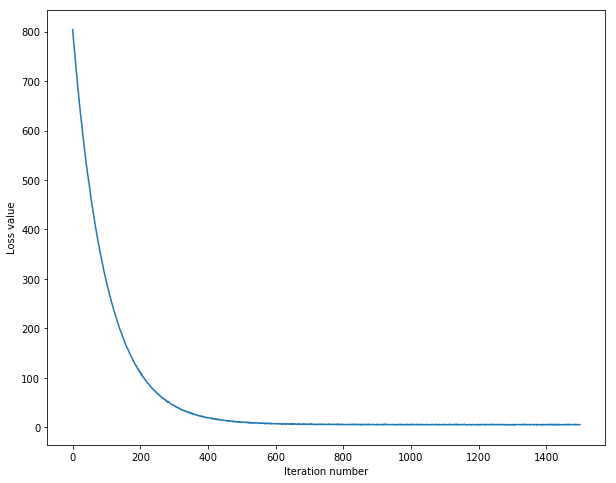

In [48]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [50]:
Y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (Y_train_pred == Y_train).mean())
Y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (Y_val_pred == Y_val).mean())

training accuracy: 0.372878
validation accuracy: 0.382000


In [51]:
#求最好的lr和正则化因子(示例，只有四种情况)
lrs = [1e-7, 1e-6]
regs = [5e4, 5e5]

results = {} #result 包含4种结果 形式为：(lr,reg) -> (training_acu,validation_acu)
best_val = -1
best_svm = None

for lr in lrs:
    for reg in regs:
        svm = LinearSVM()
        loss_hist = svm.train(X_train, Y_train, lr = lr, reg = reg, num_iters=1500, verbose=True)
        y_train_pred = svm.predict(X_train)
        acc_tr = np.mean(Y_train == y_train_pred)
        y_val_pred = svm.predict(X_val)
        acc_val = np.mean(Y_val == y_val_pred)
        
        results[(lr, reg)] = (acc_tr, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
            
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 786.717320
iteration 100 / 1500: loss 285.599996
iteration 200 / 1500: loss 107.297441
iteration 300 / 1500: loss 42.283081
iteration 400 / 1500: loss 18.886120
iteration 500 / 1500: loss 10.285922
iteration 600 / 1500: loss 7.186946
iteration 700 / 1500: loss 6.127051
iteration 800 / 1500: loss 5.661247
iteration 900 / 1500: loss 5.397798
iteration 1000 / 1500: loss 5.176778
iteration 1100 / 1500: loss 5.428151
iteration 1200 / 1500: loss 4.968169
iteration 1300 / 1500: loss 4.834642
iteration 1400 / 1500: loss 5.406005
iteration 0 / 1500: loss 7702.501240
iteration 100 / 1500: loss 7.157944
iteration 200 / 1500: loss 6.457324
iteration 300 / 1500: loss 6.518704
iteration 400 / 1500: loss 6.741346
iteration 500 / 1500: loss 6.752894
iteration 600 / 1500: loss 6.471357
iteration 700 / 1500: loss 6.270751
iteration 800 / 1500: loss 6.676653
iteration 900 / 1500: loss 6.905555
iteration 1000 / 1500: loss 6.745142
iteration 1100 / 1500: loss 6.370375
iteration 120

In [52]:
for x in results:
    print(x)

(1e-07, 50000.0)
(1e-07, 500000.0)
(1e-06, 50000.0)
(1e-06, 500000.0)


In [53]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = (y_test_pred == Y_test).mean()
print('test_accuracy:',test_accuracy)

test_accuracy: 0.367


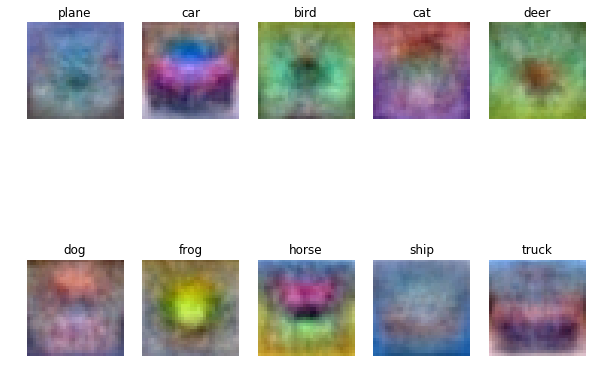

In [54]:
# Visualize the learned weights for each class

#首先去掉W的最后一行bias
w = best_svm.W[:-1,:]
w = w.reshape(32,32,3,10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2,5,i+1)
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])